In [1]:
import pandas as pd 
import numpy as np
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yhlan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yhlan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yhlan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#do not print warnings
pd.options.mode.chained_assignment = None

In [3]:
#remove "no" and "not" from the stopwords
stop_words = set(stopwords.words('english'))
stop_words.remove("no")
stop_words.remove("not")
stop_words.add("im")
stop_words.add("seem")
stop_words.add("u")
stop_words.add("ca")

In [4]:
reviews = pd.read_csv("review_select.csv")
reviews_text = reviews.loc[:,"text"]

**Data cleaning**
0. lower all the letters.
1. change "n't" to " not".
2. remove all the symbols except letters. 
3. remove all the stopwords. (should we keep the "not sth"?Yes, keep "no" and "not")
4. normalize the verb and noun .

In [5]:
lemmatizer = WordNetLemmatizer() 

def data_clean(review):
    #lower all the letters
    review = review.lower()
    #change "n't" to " not"
    review = re.sub("\n","",review)
    review = re.sub("n't"," not",review)
    review = re.sub("n'"," not",review)
    #remove all the symbols but letters
    review = re.sub("[^a-zA-Z]"," ",review)
    #remove all the stopwords except "no" and "not"
    review_words = word_tokenize(review)
    filtered_review = [w for w in review_words if not w in stop_words]
    #normalize the verb and noun 
    normalized_review = [lemmatizer.lemmatize(w,"v") for w in filtered_review]
    return " ".join(normalized_review)

We randomly chose 20,000 reviews as a sample of our whole dataset. The sampled dataset has very similar distribution of stars as the original dataset. (see the plots below)

In [6]:
import random
review_2w_index=random.sample(range(len(reviews_text)),20000)
review_2w = reviews_text[review_2w_index]

#use data_clean() to normalize the text
review_2w_clean=[]
for i in range(len(review_2w)):
    review_2w_clean.append(data_clean(list(review_2w)[i]))

stars = reviews.loc[:,"stars"]
stars_2w = stars[review_2w_index]

In [34]:
#save
review_2w_save=pd.DataFrame(review_2w_clean,columns=['text'])
stars_2w_save=pd.DataFrame(stars_2w,columns=['stars'])

data_save = pd.concat([review_2w_save,stars_2w_save],axis=1)

data_save.to_csv('reviews_clean_2w.csv', sep=',', header=True, index=True)

In [7]:
import matplotlib.pyplot as plt

num_of_stars=(sum(stars == 1.0),sum(stars == 2.0),sum(stars == 3.0),sum(stars == 4.0),sum(stars == 5.0))
num_of_stars_2w=(sum(stars_2w == 1.0),sum(stars_2w == 2.0),sum(stars_2w == 3.0),sum(stars_2w == 4.0),sum(stars_2w == 5.0))

<function matplotlib.pyplot.show(*args, **kw)>

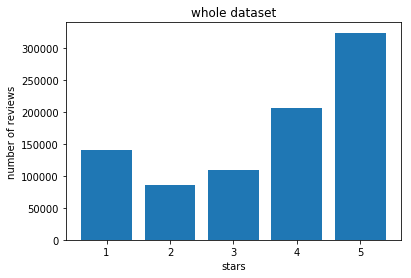

In [8]:
plt.bar([1,2,3,4,5],num_of_stars)
plt.ylabel('number of reviews')
plt.xlabel('stars')
plt.title('whole dataset')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

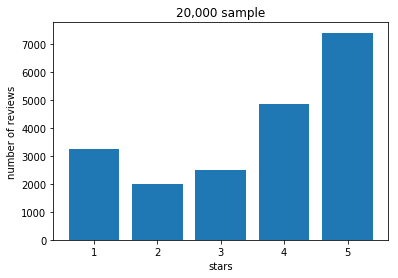

In [9]:
plt.bar([1,2,3,4,5],num_of_stars_2w)
plt.ylabel('number of reviews')
plt.xlabel('stars')
plt.title('20,000 sample')
plt.show

In [10]:
review_2w_new=review_2w_clean
review_2w_new=pd.Series(review_2w_new)
stars_2w=pd.Series(list(stars_2w))

In [11]:
def ratings_of_word(word):
    ratings = [0,0,0,0,0]
    numerator = [0,0,0,0,0]
    denominator = [sum(stars_2w == 1.0),sum(stars_2w == 2.0),sum(stars_2w == 3.0),sum(stars_2w == 4.0),sum(stars_2w == 5.0)]
    
    for j in range(5):
        j_star=review_2w_new[stars_2w == j+1]
        for i in range(len(j_star)):
            numerator[j] += list(j_star)[i].split().count(word)/len(list(j_star)[i].split())
        ratings[j] = numerator[j]/denominator[j] 
    
    return ratings

In [12]:
#ratings=ratings_of_word("fantastic")

In [13]:
def plot_word_star(ratings,word):
    plt.bar([1,2,3,4,5],ratings)
    plt.xlabel('stars')
    plt.ylabel('scores')
    plt.title(word)
    plt.show

In [14]:
#plot_word_star(ratings,"fantastic")

**Testing if the algorithm is correct with words showing attitudes**

positive: fantastic, perfect, good    
negative: terrible, awful, bad

Since the positive words had very obvious positive trend, and negative words had obvious negative trend, we believed that our algorithm to calculate the score of words was correct.

<function matplotlib.pyplot.show(*args, **kw)>

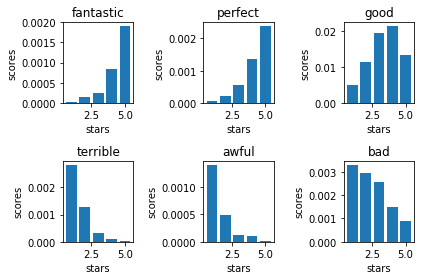

In [15]:
plt.figure(123456)

plt.subplot(231)
plot_word_star(ratings_of_word("fantastic"),"fantastic")

plt.subplot(232)
plot_word_star(ratings_of_word("perfect"),"perfect")

plt.subplot(233)
plot_word_star(ratings_of_word("good"),"good")

plt.subplot(234)
plot_word_star(ratings_of_word("terrible"),"terrible")

plt.subplot(235)
plot_word_star(ratings_of_word("awful"),"awful")

plt.subplot(236)
plot_word_star(ratings_of_word("bad"),"bad")

plt.tight_layout()
plt.show

**Food**

<function matplotlib.pyplot.show(*args, **kw)>

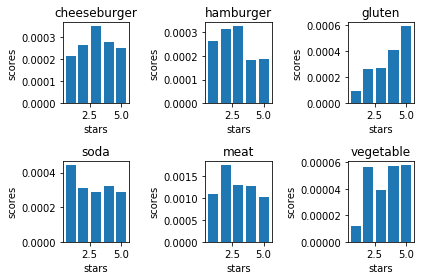

In [19]:
plt.figure(123456)

plt.subplot(231)
plot_word_star(ratings_of_word("cheeseburger"),"cheeseburger")

plt.subplot(232)
plot_word_star(ratings_of_word("hamburger"),"hamburger")

plt.subplot(233)
plot_word_star(ratings_of_word("gluten"),"gluten")

plt.subplot(234)
plot_word_star(ratings_of_word("soda"),"soda")

plt.subplot(235)
plot_word_star(ratings_of_word("meat"),"meat")

plt.subplot(236)
plot_word_star(ratings_of_word("vegetable"),"vegetable")

plt.tight_layout()
plt.show

**Service**

<function matplotlib.pyplot.show(*args, **kw)>

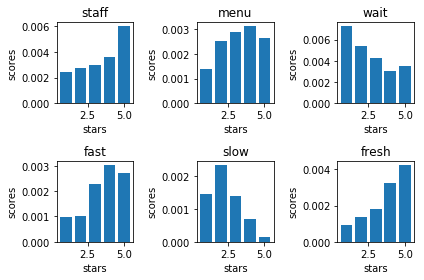

In [17]:
plt.figure(123456)

plt.subplot(231)
plot_word_star(ratings_of_word("staff"),"staff")

plt.subplot(232)
plot_word_star(ratings_of_word("menu"),"menu")

plt.subplot(233)
plot_word_star(ratings_of_word("wait"),"wait")

plt.subplot(234)
plot_word_star(ratings_of_word("fast"),"fast")

plt.subplot(235)
plot_word_star(ratings_of_word("slow"),"slow")

plt.subplot(236)
plot_word_star(ratings_of_word("fresh"),"fresh")

plt.tight_layout()
plt.show

**Brand**

<function matplotlib.pyplot.show(*args, **kw)>

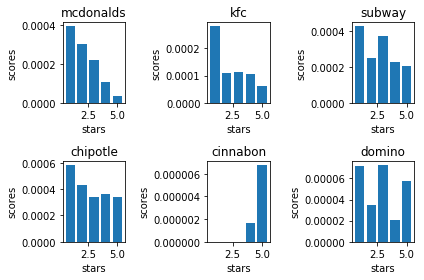

In [18]:
plt.figure(123456)

plt.subplot(231)
plot_word_star(ratings_of_word("mcdonalds"),"mcdonalds")

plt.subplot(232)
plot_word_star(ratings_of_word("kfc"),"kfc")

plt.subplot(233)
plot_word_star(ratings_of_word("subway"),"subway")

plt.subplot(234)
plot_word_star(ratings_of_word("chipotle"),"chipotle")

plt.subplot(235)
plot_word_star(ratings_of_word("cinnabon"),"cinnabon")

plt.subplot(236)
plot_word_star(ratings_of_word("domino"),"domino")

plt.tight_layout()
plt.show

**Problems:**
1. Since the codes ran slowly, we did not carry the splitting of bigram and trigram. Thus the adjectives and brands names with more than one words were not included. 
2. In the step of "normalized" the verbs, some of adjectives are transformed by accident. And their meaning were changed completely. For example, "I am thrilled." might change to "I am thrill.".